# 기존 코드

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import os
import re
import numpy as np
import pandas as pd
import collections

In [2]:
x_name = os.path.join(os.getcwd(), '데이터SET', f"{'[Track1_데이터3] samp_cst_feat'}.csv")
df_x = pd.read_csv(x_name, index_col=0)

y_name = os.path.join(os.getcwd(), '데이터SET', f"{'[Track1_데이터2] samp_train'}.csv")
df_y = pd.read_csv(y_name, index_col=0)

df = pd.merge(df_x, df_y, on='cst_id_di')

In [3]:
df.MRC_ID_DI[df.MRC_ID_DI > 0 ] = 1

C:\Users\ADMIN\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [4]:
nc_name = os.path.join(os.getcwd(), '데이터SET', f"{'[Track1_데이터4] variable_dtype'}.xlsx")
nc = pd.read_excel(nc_name, index_col=0)

In [5]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import random

#gpu있는 경우 사용
#physical_devices = tf.config.list_physical_devices('GPU') 
#tf.config.experimental.set_memory_growth(physical_devices[0], True)

seed_value= 0
os.environ['PYTHONHASHSEED']=str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_random_seed(seed_value) #set_seed -> set_random_seed

C:\Users\ADMIN\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ADMIN\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ADMIN\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ADMIN\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [6]:
import sys
ipython = get_ipython()

def hide_traceback(exc_tuple=None, filename=None, tb_offset=None,
                      exception_only=False, running_compiled_code=False):
       etype, value, tb = sys.exc_info()
       return ipython._showtraceback(etype, value, ipython.InteractiveTB.get_exception_only(etype, value))

ipython.showtraceback = hide_traceback

In [7]:
df_0 = df[df['MRC_ID_DI'] == 0].sample(frac=1)
df_1 = df[df['MRC_ID_DI'] == 1].sample(frac=1)

sample_size = len(df_0) if len(df_0) < len(df_1) else len(df_1)

#이게 내가 말했던 합쳐서 중복시킨 부분이야
df_h = pd.concat([df_0.head(sample_size), df_1.head(sample_size)]).sample(frac=1)
df_t = pd.concat([df_0.tail(sample_size), df_1.head(sample_size)]).sample(frac=1)
df_f = pd.concat([df_h, df_t]).sample(frac=1)

In [8]:
X = df_f.drop(columns = ['MRC_ID_DI'], axis=1)
y = tf.keras.utils.to_categorical(df_f['MRC_ID_DI'])

In [9]:
X=df.loc[:,'VAR002':'VAR227']
y=df.loc[:,'MRC_ID_DI']
print(X.shape, y.shape)

(10124, 226) (10124,)


In [10]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [11]:
input_ = tf.keras.Input(dtype = tf.float32, shape = (len(X.columns),))

dense_layer_1_1 = tf.keras.layers.Dense(units = 10, activation = tf.nn.relu)(input_)
dense_layer_1_2 = tf.keras.layers.Dense(units = 10, activation = tf.nn.relu)(dense_layer_1_1)
dense_layer_1_3 = tf.keras.layers.Dense(units = 10, activation = tf.nn.relu)(dense_layer_1_2)
dense_layer_1_4 = tf.keras.layers.Dense(units = 10, activation = tf.nn.relu)(dense_layer_1_3)

dropout_1_5 = tf.keras.layers.Dropout(rate = 0.2)(dense_layer_1_1)

output = tf.keras.layers.Dense(units = 2, activation = tf.nn.softmax)(dropout_1_5)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [12]:
model = tf.keras.Model(inputs=input_, outputs=output)

In [13]:
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy, optimizer=tf.compat.v1.train.AdamOptimizer(learning_rate=0.00005), metrics=['acc'])
# CategoricalCrossentropy-> sparse_categorical_crossentropy
print(model.summary()) 

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 226)]             0         
_________________________________________________________________
dense (Dense)                (None, 10)                2270      
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 22        
Total params: 2,292
Trainable params: 2,292
Non-trainable params: 0
_________________________________________________________________
None


In [14]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=100)
history = model.fit(x=X_train, y=y_train, batch_size=32, epochs=10000, verbose=1, validation_split=0.1, callbacks=[callback])

Train on 8199 samples, validate on 912 samples
Epoch 1/10000
8199/8199 [==============================] - 0s 37us/sample - loss: 0.6197 - acc: 0.7290 - val_loss: 0.5549 - val_acc: 0.8092
Epoch 2/10000
8199/8199 [==============================] - 0s 26us/sample - loss: 0.5105 - acc: 0.8058 - val_loss: 0.4785 - val_acc: 0.8081
Epoch 3/10000
8199/8199 [==============================] - 0s 26us/sample - loss: 0.4626 - acc: 0.8101 - val_loss: 0.4477 - val_acc: 0.8114
Epoch 4/10000
8199/8199 [==============================] - 0s 26us/sample - loss: 0.4412 - acc: 0.8095 - val_loss: 0.4342 - val_acc: 0.8158
Epoch 5/10000
8199/8199 [==============================] - 0s 26us/sample - loss: 0.4334 - acc: 0.8140 - val_loss: 0.4269 - val_acc: 0.8202
Epoch 6/10000
8199/8199 [==============================] - 0s 26us/sample - loss: 0.4238 - acc: 0.8149 - val_loss: 0.4215 - val_acc: 0.8202
Epoch 7/10000
8199/8199 [==============================] - 0s 26us/sample - loss: 0.4196 - acc: 0.8141 - val_loss

Epoch 59/10000
8199/8199 [==============================] - 0s 26us/sample - loss: 0.3521 - acc: 0.8378 - val_loss: 0.3523 - val_acc: 0.8366
Epoch 60/10000
8199/8199 [==============================] - 0s 26us/sample - loss: 0.3522 - acc: 0.8375 - val_loss: 0.3518 - val_acc: 0.8388
Epoch 61/10000
8199/8199 [==============================] - 0s 26us/sample - loss: 0.3509 - acc: 0.8332 - val_loss: 0.3513 - val_acc: 0.8388
Epoch 62/10000
8199/8199 [==============================] - 0s 26us/sample - loss: 0.3490 - acc: 0.8397 - val_loss: 0.3509 - val_acc: 0.8421
Epoch 63/10000
8199/8199 [==============================] - 0s 26us/sample - loss: 0.3503 - acc: 0.8367 - val_loss: 0.3503 - val_acc: 0.8432
Epoch 64/10000
8199/8199 [==============================] - 0s 26us/sample - loss: 0.3512 - acc: 0.8403 - val_loss: 0.3501 - val_acc: 0.8421
Epoch 65/10000
8199/8199 [==============================] - 0s 26us/sample - loss: 0.3487 - acc: 0.8394 - val_loss: 0.3497 - val_acc: 0.8410
Epoch 66/1000

Epoch 117/10000
8199/8199 [==============================] - 0s 26us/sample - loss: 0.3322 - acc: 0.8449 - val_loss: 0.3378 - val_acc: 0.8377
Epoch 118/10000
8199/8199 [==============================] - 0s 26us/sample - loss: 0.3327 - acc: 0.8482 - val_loss: 0.3376 - val_acc: 0.8377
Epoch 119/10000
8199/8199 [==============================] - 0s 27us/sample - loss: 0.3326 - acc: 0.8445 - val_loss: 0.3375 - val_acc: 0.8366
Epoch 120/10000
8199/8199 [==============================] - ETA: 0s - loss: 0.3329 - acc: 0.845 - 0s 28us/sample - loss: 0.3317 - acc: 0.8457 - val_loss: 0.3373 - val_acc: 0.8377
Epoch 121/10000
8199/8199 [==============================] - 0s 27us/sample - loss: 0.3307 - acc: 0.8521 - val_loss: 0.3372 - val_acc: 0.8388
Epoch 122/10000
8199/8199 [==============================] - 0s 28us/sample - loss: 0.3311 - acc: 0.8490 - val_loss: 0.3371 - val_acc: 0.8388
Epoch 123/10000
8199/8199 [==============================] - 0s 26us/sample - loss: 0.3334 - acc: 0.8474 - val

8199/8199 [==============================] - 0s 27us/sample - loss: 0.3239 - acc: 0.8511 - val_loss: 0.3326 - val_acc: 0.8410
Epoch 175/10000
8199/8199 [==============================] - 0s 26us/sample - loss: 0.3224 - acc: 0.8551 - val_loss: 0.3324 - val_acc: 0.8432
Epoch 176/10000
8199/8199 [==============================] - 0s 26us/sample - loss: 0.3264 - acc: 0.8489 - val_loss: 0.3322 - val_acc: 0.8410
Epoch 177/10000
8199/8199 [==============================] - 0s 26us/sample - loss: 0.3234 - acc: 0.8525 - val_loss: 0.3324 - val_acc: 0.8399
Epoch 178/10000
8199/8199 [==============================] - 0s 26us/sample - loss: 0.3205 - acc: 0.8529 - val_loss: 0.3324 - val_acc: 0.8410
Epoch 179/10000
8199/8199 [==============================] - 0s 27us/sample - loss: 0.3221 - acc: 0.8500 - val_loss: 0.3324 - val_acc: 0.8421
Epoch 180/10000
8199/8199 [==============================] - 0s 26us/sample - loss: 0.3251 - acc: 0.8485 - val_loss: 0.3320 - val_acc: 0.8432
Epoch 181/10000
8199/8

Epoch 232/10000
8199/8199 [==============================] - 0s 26us/sample - loss: 0.3154 - acc: 0.8574 - val_loss: 0.3288 - val_acc: 0.8465
Epoch 233/10000
8199/8199 [==============================] - 0s 26us/sample - loss: 0.3159 - acc: 0.8574 - val_loss: 0.3288 - val_acc: 0.8476
Epoch 234/10000
8199/8199 [==============================] - 0s 26us/sample - loss: 0.3178 - acc: 0.8536 - val_loss: 0.3288 - val_acc: 0.8487
Epoch 235/10000
8199/8199 [==============================] - 0s 26us/sample - loss: 0.3155 - acc: 0.8573 - val_loss: 0.3285 - val_acc: 0.8498
Epoch 236/10000
8199/8199 [==============================] - 0s 26us/sample - loss: 0.3191 - acc: 0.8528 - val_loss: 0.3284 - val_acc: 0.8454
Epoch 237/10000
8199/8199 [==============================] - 0s 26us/sample - loss: 0.3170 - acc: 0.8574 - val_loss: 0.3282 - val_acc: 0.8476
Epoch 238/10000
8199/8199 [==============================] - 0s 26us/sample - loss: 0.3164 - acc: 0.8573 - val_loss: 0.3284 - val_acc: 0.8476
Epoch 

Epoch 290/10000
8199/8199 [==============================] - 0s 26us/sample - loss: 0.3101 - acc: 0.8580 - val_loss: 0.3253 - val_acc: 0.8487
Epoch 291/10000
8199/8199 [==============================] - 0s 26us/sample - loss: 0.3103 - acc: 0.8606 - val_loss: 0.3251 - val_acc: 0.8487
Epoch 292/10000
8199/8199 [==============================] - 0s 26us/sample - loss: 0.3079 - acc: 0.8624 - val_loss: 0.3249 - val_acc: 0.8520
Epoch 293/10000
8199/8199 [==============================] - 0s 26us/sample - loss: 0.3108 - acc: 0.8588 - val_loss: 0.3249 - val_acc: 0.8509
Epoch 294/10000
8199/8199 [==============================] - 0s 26us/sample - loss: 0.3086 - acc: 0.8616 - val_loss: 0.3249 - val_acc: 0.8509
Epoch 295/10000
8199/8199 [==============================] - 0s 26us/sample - loss: 0.3095 - acc: 0.8599 - val_loss: 0.3249 - val_acc: 0.8487
Epoch 296/10000
8199/8199 [==============================] - 0s 26us/sample - loss: 0.3102 - acc: 0.8607 - val_loss: 0.3251 - val_acc: 0.8509
Epoch 

Epoch 348/10000
8199/8199 [==============================] - 0s 26us/sample - loss: 0.3050 - acc: 0.8619 - val_loss: 0.3225 - val_acc: 0.8487
Epoch 349/10000
8199/8199 [==============================] - 0s 26us/sample - loss: 0.3059 - acc: 0.8603 - val_loss: 0.3224 - val_acc: 0.8553
Epoch 350/10000
8199/8199 [==============================] - 0s 26us/sample - loss: 0.3054 - acc: 0.8599 - val_loss: 0.3219 - val_acc: 0.8553
Epoch 351/10000
8199/8199 [==============================] - 0s 26us/sample - loss: 0.3064 - acc: 0.8614 - val_loss: 0.3220 - val_acc: 0.8564
Epoch 352/10000
8199/8199 [==============================] - 0s 26us/sample - loss: 0.3053 - acc: 0.8600 - val_loss: 0.3221 - val_acc: 0.8542
Epoch 353/10000
8199/8199 [==============================] - 0s 27us/sample - loss: 0.3026 - acc: 0.8632 - val_loss: 0.3222 - val_acc: 0.8542
Epoch 354/10000
8199/8199 [==============================] - 0s 26us/sample - loss: 0.3036 - acc: 0.8623 - val_loss: 0.3219 - val_acc: 0.8509
Epoch 

Epoch 406/10000
8199/8199 [==============================] - 0s 27us/sample - loss: 0.3019 - acc: 0.8632 - val_loss: 0.3204 - val_acc: 0.8564
Epoch 407/10000
8199/8199 [==============================] - 0s 26us/sample - loss: 0.3018 - acc: 0.8613 - val_loss: 0.3205 - val_acc: 0.8575
Epoch 408/10000
8199/8199 [==============================] - 0s 26us/sample - loss: 0.3020 - acc: 0.8635 - val_loss: 0.3201 - val_acc: 0.8575
Epoch 409/10000
8199/8199 [==============================] - 0s 29us/sample - loss: 0.2989 - acc: 0.8623 - val_loss: 0.3202 - val_acc: 0.8575
Epoch 410/10000
8199/8199 [==============================] - 0s 29us/sample - loss: 0.3019 - acc: 0.8652 - val_loss: 0.3201 - val_acc: 0.8586
Epoch 411/10000
8199/8199 [==============================] - 0s 28us/sample - loss: 0.2996 - acc: 0.8639 - val_loss: 0.3204 - val_acc: 0.8575
Epoch 412/10000
8199/8199 [==============================] - 0s 28us/sample - loss: 0.3017 - acc: 0.8617 - val_loss: 0.3206 - val_acc: 0.8575
Epoch 

Epoch 464/10000
8199/8199 [==============================] - 0s 26us/sample - loss: 0.2978 - acc: 0.8649 - val_loss: 0.3189 - val_acc: 0.8564
Epoch 465/10000
8199/8199 [==============================] - 0s 26us/sample - loss: 0.2979 - acc: 0.8645 - val_loss: 0.3194 - val_acc: 0.8564
Epoch 466/10000
8199/8199 [==============================] - 0s 26us/sample - loss: 0.2953 - acc: 0.8669 - val_loss: 0.3191 - val_acc: 0.8575
Epoch 467/10000
8199/8199 [==============================] - 0s 26us/sample - loss: 0.2983 - acc: 0.8660 - val_loss: 0.3191 - val_acc: 0.8564
Epoch 468/10000
8199/8199 [==============================] - 0s 26us/sample - loss: 0.2998 - acc: 0.8625 - val_loss: 0.3193 - val_acc: 0.8564
Epoch 469/10000
8199/8199 [==============================] - 0s 26us/sample - loss: 0.2995 - acc: 0.8647 - val_loss: 0.3195 - val_acc: 0.8542
Epoch 470/10000
8199/8199 [==============================] - 0s 27us/sample - loss: 0.2976 - acc: 0.8640 - val_loss: 0.3191 - val_acc: 0.8564
Epoch 

Epoch 522/10000
8199/8199 [==============================] - 0s 26us/sample - loss: 0.2954 - acc: 0.8657 - val_loss: 0.3198 - val_acc: 0.8520
Epoch 523/10000
8199/8199 [==============================] - ETA: 0s - loss: 0.2915 - acc: 0.865 - 0s 27us/sample - loss: 0.2926 - acc: 0.8674 - val_loss: 0.3198 - val_acc: 0.8520
Epoch 524/10000
8199/8199 [==============================] - 0s 26us/sample - loss: 0.2937 - acc: 0.8669 - val_loss: 0.3196 - val_acc: 0.8542
Epoch 525/10000
8199/8199 [==============================] - 0s 26us/sample - loss: 0.2930 - acc: 0.8673 - val_loss: 0.3201 - val_acc: 0.8542
Epoch 526/10000
8199/8199 [==============================] - 0s 26us/sample - loss: 0.2909 - acc: 0.8689 - val_loss: 0.3198 - val_acc: 0.8542
Epoch 527/10000
8199/8199 [==============================] - 0s 26us/sample - loss: 0.2923 - acc: 0.8699 - val_loss: 0.3194 - val_acc: 0.8531
Epoch 528/10000
8199/8199 [==============================] - 0s 27us/sample - loss: 0.2931 - acc: 0.8683 - val

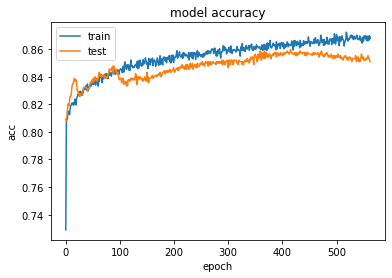

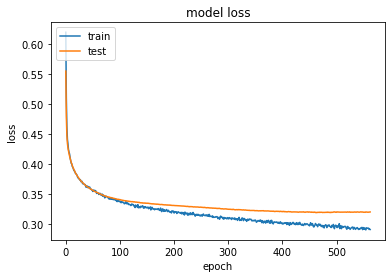

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [16]:
score = model.evaluate(x=X_test, y=y_test, verbose=1)

print("Test Score:", score[0])
print("Test ACC:", score[1])

1013/1013 [==============================] - 0s 16us/sample - loss: 0.3186 - acc: 0.8509
Test Score: 0.31859378000355426
Test ACC: 0.8509378


# feature extraction

In [17]:
df

,VAR002,VAR003,VAR004,VAR005,VAR006,VAR007,VAR008,VAR009,VAR010,VAR011,...,VAR219,VAR220,VAR221,VAR222,VAR223,VAR224,VAR225,VAR226,VAR227,MRC_ID_DI
cst_id_di,,,,,,,,,,,,,,,,,,,,,
90000000089,-0.06610,0.5280,-0.13607,0.10945,0.06557,0,0.7702,-0.18965,0.1981,0.24149,...,0.19113,0.05449,0.09471,0.27091,0.01931,0.02938,0.17105,0.12537,0.22197,0
90000000176,-0.09537,0.1347,-0.13541,0.17331,-0.19657,0,0.0616,-0.23104,0.4940,-0.39476,...,0.19437,0.06538,0.16309,0.30207,0.06053,-0.01107,0.12413,0.29702,-0.31717,1
90000000210,-0.01048,0.8360,0.37797,-0.10970,0.52032,1,0.3257,0.32632,0.7343,0.73494,...,-0.52084,-0.18568,-0.09755,-0.56565,-0.17840,-0.06314,-0.17111,-0.32239,0.33962,0
90000000212,0.05194,0.7505,0.04611,-0.16512,0.07413,0,0.5322,0.26845,0.7327,0.32617,...,-0.01934,-0.05172,-0.13245,-0.16357,-0.05697,0.01587,-0.04022,0.31213,-0.00559,1
90000000213,-0.08536,0.3767,-0.12288,0.10023,-0.43414,0,0.5468,-0.25575,0.9644,-0.52948,...,0.23122,0.07913,0.09206,0.46971,0.07964,-0.04698,0.03581,0.22588,-0.34868,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90000460112,-0.06606,0.6615,-0.09743,-0.03240,0.10111,0,0.9722,-0.02041,0.6966,0.06993,...,0.33881,-0.01692,-0.01823,0.21720,-0.08346,-0.07835,0.02321,0.32967,-0.25995,1
90000460117,-0.03031,0.0143,0.07041,-0.02519,0.58013,0,0.0330,0.06676,0.8251,0.68992,...,-0.19384,-0.02383,-0.02448,-0.05019,-0.02869,-0.05401,0.01670,-0.15880,0.48301,0
90000460233,-0.05351,0.3121,0.36925,-0.10039,0.51159,0,0.2582,0.35016,0.4638,0.68799,...,-0.45312,-0.17163,-0.08674,-0.40260,-0.15903,-0.10292,-0.11742,-0.31895,0.40357,0


In [18]:
print(df['MRC_ID_DI'].value_counts())

0    8200
1    1924
Name: MRC_ID_DI, dtype: int64


In [19]:
df_0=df[df['MRC_ID_DI']==0]
df_0

,VAR002,VAR003,VAR004,VAR005,VAR006,VAR007,VAR008,VAR009,VAR010,VAR011,...,VAR219,VAR220,VAR221,VAR222,VAR223,VAR224,VAR225,VAR226,VAR227,MRC_ID_DI
cst_id_di,,,,,,,,,,,,,,,,,,,,,
90000000089,-0.06610,0.5280,-0.13607,0.10945,0.06557,0,0.7702,-0.18965,0.1981,0.24149,...,0.19113,0.05449,0.09471,0.27091,0.01931,0.02938,0.17105,0.12537,0.22197,0
90000000210,-0.01048,0.8360,0.37797,-0.10970,0.52032,1,0.3257,0.32632,0.7343,0.73494,...,-0.52084,-0.18568,-0.09755,-0.56565,-0.17840,-0.06314,-0.17111,-0.32239,0.33962,0
90000000263,-0.10778,0.0810,-0.12917,0.06835,-0.40939,0,0.7128,-0.13009,0.7291,-0.39929,...,0.27452,0.04098,0.06074,0.49646,-0.02204,-0.06996,0.01552,0.20518,-0.09952,0
90000000322,0.02596,0.2279,0.09658,-0.21836,0.47897,0,0.1961,0.39811,0.2458,0.45440,...,-0.44143,-0.15050,-0.19061,-0.52859,-0.19092,-0.03939,-0.11918,-0.29188,0.21474,0
90000000354,0.03735,0.3486,-0.07106,0.05682,0.51936,1,0.6283,-0.11848,0.2781,0.20183,...,0.12450,0.09082,0.03790,-0.01301,0.11605,0.41329,0.01658,-0.13191,0.10532,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90000459958,-0.00925,0.7706,0.25466,-0.19329,0.43215,1,0.6892,0.44652,0.3488,0.68210,...,-0.42943,-0.13345,-0.16509,-0.57853,-0.16135,-0.09230,-0.05164,-0.14484,0.26366,0
90000460117,-0.03031,0.0143,0.07041,-0.02519,0.58013,0,0.0330,0.06676,0.8251,0.68992,...,-0.19384,-0.02383,-0.02448,-0.05019,-0.02869,-0.05401,0.01670,-0.15880,0.48301,0
90000460233,-0.05351,0.3121,0.36925,-0.10039,0.51159,0,0.2582,0.35016,0.4638,0.68799,...,-0.45312,-0.17163,-0.08674,-0.40260,-0.15903,-0.10292,-0.11742,-0.31895,0.40357,0


In [20]:
df_1=df[df['MRC_ID_DI']==1]
df_1

,VAR002,VAR003,VAR004,VAR005,VAR006,VAR007,VAR008,VAR009,VAR010,VAR011,...,VAR219,VAR220,VAR221,VAR222,VAR223,VAR224,VAR225,VAR226,VAR227,MRC_ID_DI
cst_id_di,,,,,,,,,,,,,,,,,,,,,
90000000176,-0.09537,0.1347,-0.13541,0.17331,-0.19657,0,0.0616,-0.23104,0.4940,-0.39476,...,0.19437,0.06538,0.16309,0.30207,0.06053,-0.01107,0.12413,0.29702,-0.31717,1
90000000212,0.05194,0.7505,0.04611,-0.16512,0.07413,0,0.5322,0.26845,0.7327,0.32617,...,-0.01934,-0.05172,-0.13245,-0.16357,-0.05697,0.01587,-0.04022,0.31213,-0.00559,1
90000000213,-0.08536,0.3767,-0.12288,0.10023,-0.43414,0,0.5468,-0.25575,0.9644,-0.52948,...,0.23122,0.07913,0.09206,0.46971,0.07964,-0.04698,0.03581,0.22588,-0.34868,1
90000000506,-0.02536,0.3364,-0.17063,0.10209,0.12635,0,0.2136,-0.16467,0.8193,0.19010,...,0.24960,0.07146,0.10167,0.33884,0.06834,0.07124,0.03493,0.36701,-0.03924,1
90000000648,-0.02030,0.7619,0.26428,-0.07925,0.02531,0,0.8683,0.24348,0.7742,0.19419,...,-0.16400,-0.10595,-0.06875,-0.11385,-0.11020,-0.05687,-0.10309,0.07512,-0.17489,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90000459007,-0.01883,0.3512,-0.10303,-0.04250,0.15866,0,0.1080,-0.05495,0.8638,0.30206,...,0.13235,0.00600,-0.02330,0.27080,-0.04149,-0.04106,0.02244,0.21820,0.20226,1
90000459530,-0.06234,0.1051,-0.13051,0.12851,-0.16615,0,0.2067,-0.29344,0.0498,-0.37332,...,0.39212,0.14349,0.10692,0.40572,0.25386,-0.00157,0.16095,0.14094,-0.32806,1
90000459697,-0.06025,0.4614,-0.04993,0.11152,0.09355,0,0.5997,-0.04970,0.6416,0.27737,...,0.17515,0.01051,0.11757,0.01791,0.03313,-0.02205,-0.01690,0.04556,0.06141,1


In [21]:
df_11 =pd.concat([df_1,df_1,df_1,df_1,df_1])
df_11

,VAR002,VAR003,VAR004,VAR005,VAR006,VAR007,VAR008,VAR009,VAR010,VAR011,...,VAR219,VAR220,VAR221,VAR222,VAR223,VAR224,VAR225,VAR226,VAR227,MRC_ID_DI
cst_id_di,,,,,,,,,,,,,,,,,,,,,
90000000176,-0.09537,0.1347,-0.13541,0.17331,-0.19657,0,0.0616,-0.23104,0.4940,-0.39476,...,0.19437,0.06538,0.16309,0.30207,0.06053,-0.01107,0.12413,0.29702,-0.31717,1
90000000212,0.05194,0.7505,0.04611,-0.16512,0.07413,0,0.5322,0.26845,0.7327,0.32617,...,-0.01934,-0.05172,-0.13245,-0.16357,-0.05697,0.01587,-0.04022,0.31213,-0.00559,1
90000000213,-0.08536,0.3767,-0.12288,0.10023,-0.43414,0,0.5468,-0.25575,0.9644,-0.52948,...,0.23122,0.07913,0.09206,0.46971,0.07964,-0.04698,0.03581,0.22588,-0.34868,1
90000000506,-0.02536,0.3364,-0.17063,0.10209,0.12635,0,0.2136,-0.16467,0.8193,0.19010,...,0.24960,0.07146,0.10167,0.33884,0.06834,0.07124,0.03493,0.36701,-0.03924,1
90000000648,-0.02030,0.7619,0.26428,-0.07925,0.02531,0,0.8683,0.24348,0.7742,0.19419,...,-0.16400,-0.10595,-0.06875,-0.11385,-0.11020,-0.05687,-0.10309,0.07512,-0.17489,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90000459007,-0.01883,0.3512,-0.10303,-0.04250,0.15866,0,0.1080,-0.05495,0.8638,0.30206,...,0.13235,0.00600,-0.02330,0.27080,-0.04149,-0.04106,0.02244,0.21820,0.20226,1
90000459530,-0.06234,0.1051,-0.13051,0.12851,-0.16615,0,0.2067,-0.29344,0.0498,-0.37332,...,0.39212,0.14349,0.10692,0.40572,0.25386,-0.00157,0.16095,0.14094,-0.32806,1
90000459697,-0.06025,0.4614,-0.04993,0.11152,0.09355,0,0.5997,-0.04970,0.6416,0.27737,...,0.17515,0.01051,0.11757,0.01791,0.03313,-0.02205,-0.01690,0.04556,0.06141,1


In [22]:
df_11=df_11.sample(n=8200)
df_11

,VAR002,VAR003,VAR004,VAR005,VAR006,VAR007,VAR008,VAR009,VAR010,VAR011,...,VAR219,VAR220,VAR221,VAR222,VAR223,VAR224,VAR225,VAR226,VAR227,MRC_ID_DI
cst_id_di,,,,,,,,,,,,,,,,,,,,,
90000138543,-0.05707,0.7809,-0.09640,0.05528,0.29243,0,0.0242,-0.11143,0.7847,0.34544,...,0.07247,0.00200,0.09968,0.26140,0.01412,-0.04200,-0.00446,0.08452,0.18305,1
90000058691,0.00438,0.3794,-0.08417,-0.10951,0.12776,1,0.6962,0.04914,0.5354,0.26070,...,0.17580,-0.01488,-0.09483,0.01161,-0.04020,-0.02060,0.02884,0.33536,-0.02879,1
90000228018,-0.04362,0.0105,-0.11864,-0.00827,-0.05949,0,0.7420,-0.04902,0.4499,0.08414,...,0.19105,0.02031,-0.01443,0.23493,-0.01941,-0.02903,0.05296,0.12320,-0.17762,1
90000195962,-0.12213,0.0274,-0.25815,0.12334,-0.32039,0,0.6847,-0.29627,0.0228,-0.37510,...,0.42732,0.09565,0.10743,0.51942,0.01226,-0.07426,0.08066,0.35450,-0.28390,1
90000363034,-0.03646,0.3398,-0.07645,0.16927,0.08840,0,0.1690,-0.16675,0.3168,0.05660,...,0.22693,0.04848,0.13515,0.35230,0.03987,-0.00834,-0.01082,-0.07433,0.02008,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90000104308,0.04954,0.1347,-0.09717,0.13902,-0.05856,0,0.1863,-0.27069,0.8395,-0.43402,...,0.35694,0.11572,0.12421,0.52959,0.12216,0.13512,0.03952,0.25200,-0.29966,1
90000337650,-0.03988,0.1477,0.01790,0.01505,-0.00977,0,0.2395,-0.13541,0.7972,0.05965,...,0.19639,0.06247,0.00795,0.16291,0.08199,-0.00331,0.07528,0.05504,-0.09038,1
90000175456,0.03394,0.3114,-0.19321,0.08249,-0.20538,0,0.0535,-0.14570,0.9375,-0.22156,...,0.33759,0.04529,0.05248,0.53876,0.00255,0.08623,0.13505,0.29015,-0.09754,1


In [23]:
DF = pd.merge(df_0,df_11,how='outer')
DF

,VAR002,VAR003,VAR004,VAR005,VAR006,VAR007,VAR008,VAR009,VAR010,VAR011,...,VAR219,VAR220,VAR221,VAR222,VAR223,VAR224,VAR225,VAR226,VAR227,MRC_ID_DI
0,-0.06610,0.5280,-0.13607,0.10945,0.06557,0,0.7702,-0.18965,0.1981,0.24149,...,0.19113,0.05449,0.09471,0.27091,0.01931,0.02938,0.17105,0.12537,0.22197,0
1,-0.01048,0.8360,0.37797,-0.10970,0.52032,1,0.3257,0.32632,0.7343,0.73494,...,-0.52084,-0.18568,-0.09755,-0.56565,-0.17840,-0.06314,-0.17111,-0.32239,0.33962,0
2,-0.10778,0.0810,-0.12917,0.06835,-0.40939,0,0.7128,-0.13009,0.7291,-0.39929,...,0.27452,0.04098,0.06074,0.49646,-0.02204,-0.06996,0.01552,0.20518,-0.09952,0
3,0.02596,0.2279,0.09658,-0.21836,0.47897,0,0.1961,0.39811,0.2458,0.45440,...,-0.44143,-0.15050,-0.19061,-0.52859,-0.19092,-0.03939,-0.11918,-0.29188,0.21474,0
4,0.03735,0.3486,-0.07106,0.05682,0.51936,1,0.6283,-0.11848,0.2781,0.20183,...,0.12450,0.09082,0.03790,-0.01301,0.11605,0.41329,0.01658,-0.13191,0.10532,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16395,-0.04333,0.0141,-0.09883,0.10387,-0.28672,0,0.0138,-0.21343,0.8414,-0.36820,...,0.35487,0.11576,0.09007,0.60444,0.17611,-0.01544,0.17696,0.23089,-0.14242,1
16396,-0.04333,0.0141,-0.09883,0.10387,-0.28672,0,0.0138,-0.21343,0.8414,-0.36820,...,0.35487,0.11576,0.09007,0.60444,0.17611,-0.01544,0.17696,0.23089,-0.14242,1
16397,-0.04333,0.0141,-0.09883,0.10387,-0.28672,0,0.0138,-0.21343,0.8414,-0.36820,...,0.35487,0.11576,0.09007,0.60444,0.17611,-0.01544,0.17696,0.23089,-0.14242,1
16398,0.01582,0.2878,-0.01433,-0.05258,0.29836,0,0.5827,0.03621,0.2206,0.42721,...,-0.06714,0.01031,-0.04328,-0.13777,0.04718,-0.00704,-0.01033,-0.05327,0.04590,1


In [24]:
df2=DF.sample(frac=1)
df2

,VAR002,VAR003,VAR004,VAR005,VAR006,VAR007,VAR008,VAR009,VAR010,VAR011,...,VAR219,VAR220,VAR221,VAR222,VAR223,VAR224,VAR225,VAR226,VAR227,MRC_ID_DI
13746,-0.06089,0.3584,-0.14236,0.08314,-0.00841,0,0.2965,-0.18202,0.9334,-0.05455,...,0.23922,0.13177,0.08977,0.41950,0.27230,-0.04413,0.02582,0.17679,-0.24452,1
1193,-0.03367,0.8111,0.33054,-0.18907,0.50606,0,0.4886,0.31240,0.1540,0.55700,...,-0.45100,-0.16388,-0.16951,-0.57495,-0.18113,-0.10811,-0.10341,-0.36850,0.29112,0
451,-0.03627,0.8279,0.13692,0.00587,0.47595,0,0.9115,0.17639,0.8451,0.69387,...,-0.31046,-0.11550,-0.00113,-0.41024,-0.10418,-0.04688,-0.09820,-0.00405,0.42762,0
12658,0.12792,0.1166,-0.09195,0.07691,0.02707,0,0.1782,-0.15978,0.4563,0.18952,...,0.24945,0.01816,0.06437,0.28888,0.02745,0.31398,0.00316,0.15535,0.15747,1
2863,-0.03910,0.3933,0.08382,-0.04888,0.20399,0,0.2904,0.06168,0.8853,0.54524,...,-0.04259,-0.10335,-0.04549,-0.00771,-0.08759,-0.07035,-0.04952,0.13356,0.26567,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6067,-0.05588,0.5902,-0.01794,0.02727,0.30702,0,0.4811,-0.07124,0.7522,0.49023,...,-0.13421,0.01838,0.04953,-0.17271,0.00744,-0.05669,0.00900,-0.07454,0.43960,0
303,0.00779,0.8573,0.09643,-0.17238,0.57101,0,0.5401,0.27440,0.3652,0.54342,...,-0.54095,-0.08010,-0.14624,-0.62989,-0.05792,-0.06233,-0.11014,-0.38185,0.27649,0
4734,0.01185,0.7955,0.19087,-0.11105,0.15742,0,0.2971,0.17121,0.7251,0.45311,...,-0.49866,-0.11848,-0.09278,-0.54630,-0.07028,-0.03942,-0.14239,-0.30948,0.23604,0
8005,0.24850,0.9405,-0.01819,-0.09128,0.36717,1,0.3084,0.10080,0.0370,0.52156,...,-0.20750,-0.02396,-0.08080,-0.17573,-0.05183,0.05814,0.54887,-0.19343,0.55406,0


In [25]:

list95 = ['VAR034','VAR089',
           'VAR091','VAR116','VAR123','VAR126','VAR134','VAR149','VAR153','VAR157','VAR160','VAR167','VAR169','VAR174','VAR176','VAR184',
           'VAR202','VAR204','VAR209','VAR216','VAR218','VAR219','VAR222']

list96 = ['VAR056',
         'VAR069','VAR122','VAR123','VAR126','VAR134','VAR137','VAR157','VAR159','VAR184','VAR196','VAR215','VAR216','VAR218','VAR219']

list97 = ['VAR058','VAR076','VAR134','VAR157','VAR176','VAR203','VAR215','VAR216','VAR218','VAR219','VAR222']

list98 = ['VAR093','VAR106','VAR114','VAR115','VAR122','VAR147','VAR157']

lists= list95+list96+list97+list98
print(len(lists))
lists = list(set(lists))
print(len(lists))
#var015추가 
#lists.append('VAR015')
#print(len(lists))

df2=df2.drop(lists,axis=1)
df2

56
38


,VAR002,VAR003,VAR004,VAR005,VAR006,VAR007,VAR008,VAR009,VAR010,VAR011,...,VAR214,VAR217,VAR220,VAR221,VAR223,VAR224,VAR225,VAR226,VAR227,MRC_ID_DI
13746,-0.06089,0.3584,-0.14236,0.08314,-0.00841,0,0.2965,-0.18202,0.9334,-0.05455,...,-0.20634,0.04837,0.13177,0.08977,0.27230,-0.04413,0.02582,0.17679,-0.24452,1
1193,-0.03367,0.8111,0.33054,-0.18907,0.50606,0,0.4886,0.31240,0.1540,0.55700,...,0.22173,0.19258,-0.16388,-0.16951,-0.18113,-0.10811,-0.10341,-0.36850,0.29112,0
451,-0.03627,0.8279,0.13692,0.00587,0.47595,0,0.9115,0.17639,0.8451,0.69387,...,-0.02776,0.08458,-0.11550,-0.00113,-0.10418,-0.04688,-0.09820,-0.00405,0.42762,0
12658,0.12792,0.1166,-0.09195,0.07691,0.02707,0,0.1782,-0.15978,0.4563,0.18952,...,-0.09354,-0.09128,0.01816,0.06437,0.02745,0.31398,0.00316,0.15535,0.15747,1
2863,-0.03910,0.3933,0.08382,-0.04888,0.20399,0,0.2904,0.06168,0.8853,0.54524,...,-0.20188,0.05998,-0.10335,-0.04549,-0.08759,-0.07035,-0.04952,0.13356,0.26567,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6067,-0.05588,0.5902,-0.01794,0.02727,0.30702,0,0.4811,-0.07124,0.7522,0.49023,...,-0.00627,-0.02105,0.01838,0.04953,0.00744,-0.05669,0.00900,-0.07454,0.43960,0
303,0.00779,0.8573,0.09643,-0.17238,0.57101,0,0.5401,0.27440,0.3652,0.54342,...,0.30241,0.22383,-0.08010,-0.14624,-0.05792,-0.06233,-0.11014,-0.38185,0.27649,0
4734,0.01185,0.7955,0.19087,-0.11105,0.15742,0,0.2971,0.17121,0.7251,0.45311,...,0.22073,-0.22339,-0.11848,-0.09278,-0.07028,-0.03942,-0.14239,-0.30948,0.23604,0
8005,0.24850,0.9405,-0.01819,-0.09128,0.36717,1,0.3084,0.10080,0.0370,0.52156,...,0.21994,-0.08585,-0.02396,-0.08080,-0.05183,0.05814,0.54887,-0.19343,0.55406,0


In [26]:
X=df2.loc[:,'VAR002':'VAR227']
y=df2.loc[:,'MRC_ID_DI']
print(X.shape, y.shape)

(16400, 188) (16400,)


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [28]:
input_ = tf.keras.Input(dtype = tf.float32, shape = (len(X.columns),))

dense_layer_1_1 = tf.keras.layers.Dense(units = 10, activation = tf.nn.relu)(input_)
dense_layer_1_2 = tf.keras.layers.Dense(units = 10, activation = tf.nn.relu)(dense_layer_1_1)
dense_layer_1_3 = tf.keras.layers.Dense(units = 10, activation = tf.nn.relu)(dense_layer_1_2)
dense_layer_1_4 = tf.keras.layers.Dense(units = 10, activation = tf.nn.relu)(dense_layer_1_3)

dropout_1_5 = tf.keras.layers.Dropout(rate = 0.2)(dense_layer_1_1)

output = tf.keras.layers.Dense(units = 2, activation = tf.nn.softmax)(dropout_1_5)

In [29]:
model = tf.keras.Model(inputs=input_, outputs=output)

In [30]:
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy, optimizer=tf.compat.v1.train.AdamOptimizer(learning_rate=0.00005), metrics=['acc'])
print(model.summary())

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 188)]             0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1890      
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 22        
Total params: 1,912
Trainable params: 1,912
Non-trainable params: 0
_________________________________________________________________
None


In [31]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=100)
history = model.fit(x=X_train, y=y_train, batch_size=32, epochs=10000, verbose=1, validation_split=0.1, callbacks=[callback])

Train on 13284 samples, validate on 1476 samples
Epoch 1/10000
13284/13284 [==============================] - 0s 33us/sample - loss: 0.6413 - acc: 0.6084 - val_loss: 0.6223 - val_acc: 0.6551
Epoch 2/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.6057 - acc: 0.6791 - val_loss: 0.5966 - val_acc: 0.6911
Epoch 3/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.5815 - acc: 0.7114 - val_loss: 0.5788 - val_acc: 0.7060
Epoch 4/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.5666 - acc: 0.7207 - val_loss: 0.5655 - val_acc: 0.7127
Epoch 5/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.5565 - acc: 0.7272 - val_loss: 0.5557 - val_acc: 0.7188
Epoch 6/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.5452 - acc: 0.7312 - val_loss: 0.5473 - val_acc: 0.7188
Epoch 7/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.5387 - acc: 0

Epoch 58/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.4420 - acc: 0.7949 - val_loss: 0.4489 - val_acc: 0.7886
Epoch 59/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.4428 - acc: 0.7949 - val_loss: 0.4482 - val_acc: 0.7879
Epoch 60/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.4419 - acc: 0.7961 - val_loss: 0.4479 - val_acc: 0.7866
Epoch 61/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.4414 - acc: 0.7959 - val_loss: 0.4471 - val_acc: 0.7852
Epoch 62/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.4409 - acc: 0.7974 - val_loss: 0.4467 - val_acc: 0.7873
Epoch 63/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.4380 - acc: 0.7995 - val_loss: 0.4460 - val_acc: 0.7900
Epoch 64/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.4374 - acc: 0.7981 - val_loss: 0.4453 - val_acc: 0.7866

13284/13284 [==============================] - 0s 27us/sample - loss: 0.4164 - acc: 0.8081 - val_loss: 0.4268 - val_acc: 0.7940
Epoch 116/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.4153 - acc: 0.8082 - val_loss: 0.4265 - val_acc: 0.7947
Epoch 117/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.4148 - acc: 0.8091 - val_loss: 0.4262 - val_acc: 0.7954
Epoch 118/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.4153 - acc: 0.8101 - val_loss: 0.4263 - val_acc: 0.7940
Epoch 119/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.4137 - acc: 0.8077 - val_loss: 0.4260 - val_acc: 0.7920
Epoch 120/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.4140 - acc: 0.8101 - val_loss: 0.4254 - val_acc: 0.7947
Epoch 121/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.4139 - acc: 0.8108 - val_loss: 0.4247 - val_acc: 0.7954
Epoch 12

13284/13284 [==============================] - 0s 27us/sample - loss: 0.4015 - acc: 0.8174 - val_loss: 0.4139 - val_acc: 0.8028
Epoch 173/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.3990 - acc: 0.8174 - val_loss: 0.4143 - val_acc: 0.8022
Epoch 174/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.4021 - acc: 0.8178 - val_loss: 0.4136 - val_acc: 0.8056
Epoch 175/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.3996 - acc: 0.8167 - val_loss: 0.4137 - val_acc: 0.8008
Epoch 176/10000
13284/13284 [==============================] - 0s 28us/sample - loss: 0.4014 - acc: 0.8141 - val_loss: 0.4133 - val_acc: 0.8049
Epoch 177/10000
13284/13284 [==============================] - 0s 28us/sample - loss: 0.4011 - acc: 0.8165 - val_loss: 0.4132 - val_acc: 0.8028
Epoch 178/10000
13284/13284 [==============================] - 0s 28us/sample - loss: 0.4004 - acc: 0.8160 - val_loss: 0.4134 - val_acc: 0.8049
Epoch 17

13284/13284 [==============================] - 0s 28us/sample - loss: 0.3893 - acc: 0.8223 - val_loss: 0.4057 - val_acc: 0.8089
Epoch 230/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.3891 - acc: 0.8211 - val_loss: 0.4060 - val_acc: 0.8103
Epoch 231/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.3894 - acc: 0.8212 - val_loss: 0.4057 - val_acc: 0.8089
Epoch 232/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.3892 - acc: 0.8226 - val_loss: 0.4050 - val_acc: 0.8123
Epoch 233/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.3901 - acc: 0.8218 - val_loss: 0.4047 - val_acc: 0.8103
Epoch 234/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.3896 - acc: 0.8221 - val_loss: 0.4051 - val_acc: 0.8089
Epoch 235/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.3897 - acc: 0.8237 - val_loss: 0.4044 - val_acc: 0.8089
Epoch 23

13284/13284 [==============================] - 0s 27us/sample - loss: 0.3799 - acc: 0.8294 - val_loss: 0.3974 - val_acc: 0.8117
Epoch 287/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.3797 - acc: 0.8254 - val_loss: 0.3972 - val_acc: 0.8110
Epoch 288/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.3800 - acc: 0.8289 - val_loss: 0.3970 - val_acc: 0.8130
Epoch 289/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.3799 - acc: 0.8255 - val_loss: 0.3967 - val_acc: 0.8123
Epoch 290/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.3791 - acc: 0.8259 - val_loss: 0.3962 - val_acc: 0.8150
Epoch 291/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.3773 - acc: 0.8299 - val_loss: 0.3966 - val_acc: 0.8144
Epoch 292/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.3777 - acc: 0.8303 - val_loss: 0.3967 - val_acc: 0.8137
Epoch 29

13284/13284 [==============================] - 0s 27us/sample - loss: 0.3685 - acc: 0.8375 - val_loss: 0.3905 - val_acc: 0.8184
Epoch 344/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.3690 - acc: 0.8351 - val_loss: 0.3903 - val_acc: 0.8205
Epoch 345/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.3724 - acc: 0.8324 - val_loss: 0.3901 - val_acc: 0.8198
Epoch 346/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.3708 - acc: 0.8332 - val_loss: 0.3900 - val_acc: 0.8205
Epoch 347/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.3721 - acc: 0.8326 - val_loss: 0.3897 - val_acc: 0.8205
Epoch 348/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.3691 - acc: 0.8347 - val_loss: 0.3898 - val_acc: 0.8178
Epoch 349/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.3690 - acc: 0.8358 - val_loss: 0.3894 - val_acc: 0.8198
Epoch 35

13284/13284 [==============================] - 0s 27us/sample - loss: 0.3649 - acc: 0.8366 - val_loss: 0.3847 - val_acc: 0.8238
Epoch 400/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.3622 - acc: 0.8388 - val_loss: 0.3848 - val_acc: 0.8218
Epoch 401/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.3646 - acc: 0.8375 - val_loss: 0.3846 - val_acc: 0.8259
Epoch 402/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.3633 - acc: 0.8382 - val_loss: 0.3847 - val_acc: 0.8238
Epoch 403/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.3627 - acc: 0.8375 - val_loss: 0.3847 - val_acc: 0.8238
Epoch 404/10000
13284/13284 [==============================] - 0s 28us/sample - loss: 0.3621 - acc: 0.8392 - val_loss: 0.3845 - val_acc: 0.8238
Epoch 405/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.3643 - acc: 0.8382 - val_loss: 0.3850 - val_acc: 0.8205
Epoch 40

13284/13284 [==============================] - 0s 28us/sample - loss: 0.3561 - acc: 0.8433 - val_loss: 0.3806 - val_acc: 0.8306
Epoch 457/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.3585 - acc: 0.8418 - val_loss: 0.3806 - val_acc: 0.8306
Epoch 458/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.3563 - acc: 0.8430 - val_loss: 0.3804 - val_acc: 0.8299
Epoch 459/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.3564 - acc: 0.8441 - val_loss: 0.3802 - val_acc: 0.8286
Epoch 460/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.3565 - acc: 0.8430 - val_loss: 0.3800 - val_acc: 0.8299
Epoch 461/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.3576 - acc: 0.8407 - val_loss: 0.3798 - val_acc: 0.8306
Epoch 462/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.3570 - acc: 0.8405 - val_loss: 0.3802 - val_acc: 0.8299
Epoch 46

13284/13284 [==============================] - 0s 27us/sample - loss: 0.3510 - acc: 0.8475 - val_loss: 0.3763 - val_acc: 0.8327
Epoch 514/10000
13284/13284 [==============================] - 0s 28us/sample - loss: 0.3500 - acc: 0.8475 - val_loss: 0.3765 - val_acc: 0.8313
Epoch 515/10000
13284/13284 [==============================] - 0s 28us/sample - loss: 0.3489 - acc: 0.8452 - val_loss: 0.3768 - val_acc: 0.8293
Epoch 516/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.3502 - acc: 0.8468 - val_loss: 0.3767 - val_acc: 0.8320
Epoch 517/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.3484 - acc: 0.8462 - val_loss: 0.3767 - val_acc: 0.8293
Epoch 518/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.3508 - acc: 0.8436 - val_loss: 0.3763 - val_acc: 0.8313
Epoch 519/10000
13284/13284 [==============================] - 0s 29us/sample - loss: 0.3526 - acc: 0.8445 - val_loss: 0.3766 - val_acc: 0.8340
Epoch 52

13284/13284 [==============================] - 0s 27us/sample - loss: 0.3467 - acc: 0.8484 - val_loss: 0.3729 - val_acc: 0.8320
Epoch 571/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.3469 - acc: 0.8476 - val_loss: 0.3726 - val_acc: 0.8360
Epoch 572/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.3485 - acc: 0.8449 - val_loss: 0.3727 - val_acc: 0.8367
Epoch 573/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.3441 - acc: 0.8482 - val_loss: 0.3725 - val_acc: 0.8340
Epoch 574/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.3481 - acc: 0.8464 - val_loss: 0.3729 - val_acc: 0.8354
Epoch 575/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.3479 - acc: 0.8466 - val_loss: 0.3729 - val_acc: 0.8320
Epoch 576/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.3457 - acc: 0.8462 - val_loss: 0.3729 - val_acc: 0.8360
Epoch 57

13284/13284 [==============================] - 0s 27us/sample - loss: 0.3392 - acc: 0.8529 - val_loss: 0.3694 - val_acc: 0.8381
Epoch 628/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.3415 - acc: 0.8494 - val_loss: 0.3691 - val_acc: 0.8381
Epoch 629/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.3418 - acc: 0.8502 - val_loss: 0.3692 - val_acc: 0.8388
Epoch 630/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.3399 - acc: 0.8498 - val_loss: 0.3689 - val_acc: 0.8401
Epoch 631/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.3380 - acc: 0.8526 - val_loss: 0.3688 - val_acc: 0.8415
Epoch 632/10000
13284/13284 [==============================] - 0s 28us/sample - loss: 0.3428 - acc: 0.8516 - val_loss: 0.3692 - val_acc: 0.8401
Epoch 633/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.3429 - acc: 0.8475 - val_loss: 0.3695 - val_acc: 0.8381
Epoch 63

13284/13284 [==============================] - 0s 27us/sample - loss: 0.3357 - acc: 0.8549 - val_loss: 0.3669 - val_acc: 0.8394
Epoch 685/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.3349 - acc: 0.8540 - val_loss: 0.3668 - val_acc: 0.8367
Epoch 686/10000
13284/13284 [==============================] - 0s 28us/sample - loss: 0.3356 - acc: 0.8530 - val_loss: 0.3666 - val_acc: 0.8374
Epoch 687/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.3318 - acc: 0.8562 - val_loss: 0.3668 - val_acc: 0.8388
Epoch 688/10000
13284/13284 [==============================] - 0s 28us/sample - loss: 0.3342 - acc: 0.8542 - val_loss: 0.3667 - val_acc: 0.8367
Epoch 689/10000
13284/13284 [==============================] - 0s 28us/sample - loss: 0.3350 - acc: 0.8568 - val_loss: 0.3664 - val_acc: 0.8367
Epoch 690/10000
13284/13284 [==============================] - 0s 28us/sample - loss: 0.3378 - acc: 0.8515 - val_loss: 0.3663 - val_acc: 0.8381
Epoch 69

13284/13284 [==============================] - 0s 27us/sample - loss: 0.3281 - acc: 0.8564 - val_loss: 0.3648 - val_acc: 0.8408
Epoch 742/10000
13284/13284 [==============================] - 0s 28us/sample - loss: 0.3296 - acc: 0.8588 - val_loss: 0.3644 - val_acc: 0.8401
Epoch 743/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.3317 - acc: 0.8573 - val_loss: 0.3644 - val_acc: 0.8408
Epoch 744/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.3314 - acc: 0.8559 - val_loss: 0.3651 - val_acc: 0.8408
Epoch 745/10000
13284/13284 [==============================] - 0s 28us/sample - loss: 0.3273 - acc: 0.8570 - val_loss: 0.3649 - val_acc: 0.8401
Epoch 746/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.3304 - acc: 0.8586 - val_loss: 0.3647 - val_acc: 0.8394
Epoch 747/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.3313 - acc: 0.8569 - val_loss: 0.3646 - val_acc: 0.8408
Epoch 74

Epoch 798/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.3288 - acc: 0.8584 - val_loss: 0.3629 - val_acc: 0.8394
Epoch 799/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.3294 - acc: 0.8579 - val_loss: 0.3627 - val_acc: 0.8401
Epoch 800/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.3277 - acc: 0.8578 - val_loss: 0.3629 - val_acc: 0.8394
Epoch 801/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.3239 - acc: 0.8607 - val_loss: 0.3632 - val_acc: 0.8401
Epoch 802/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.3268 - acc: 0.8552 - val_loss: 0.3628 - val_acc: 0.8401
Epoch 803/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.3268 - acc: 0.8575 - val_loss: 0.3622 - val_acc: 0.8428
Epoch 804/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.3262 - acc: 0.8580 - val_loss: 0.3626 - val_acc:

Epoch 855/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.3223 - acc: 0.8638 - val_loss: 0.3611 - val_acc: 0.8449
Epoch 856/10000
13284/13284 [==============================] - 0s 28us/sample - loss: 0.3226 - acc: 0.8634 - val_loss: 0.3604 - val_acc: 0.8428
Epoch 857/10000
13284/13284 [==============================] - 0s 28us/sample - loss: 0.3187 - acc: 0.8622 - val_loss: 0.3607 - val_acc: 0.8408
Epoch 858/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.3231 - acc: 0.8594 - val_loss: 0.3604 - val_acc: 0.8435
Epoch 859/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.3211 - acc: 0.8604 - val_loss: 0.3603 - val_acc: 0.8421
Epoch 860/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.3197 - acc: 0.8643 - val_loss: 0.3603 - val_acc: 0.8442
Epoch 861/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.3245 - acc: 0.8599 - val_loss: 0.3605 - val_acc:

Epoch 912/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.3182 - acc: 0.8636 - val_loss: 0.3591 - val_acc: 0.8462
Epoch 913/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.3195 - acc: 0.8637 - val_loss: 0.3594 - val_acc: 0.8455
Epoch 914/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.3200 - acc: 0.8624 - val_loss: 0.3596 - val_acc: 0.8449
Epoch 915/10000
13284/13284 [==============================] - 0s 26us/sample - loss: 0.3205 - acc: 0.8656 - val_loss: 0.3589 - val_acc: 0.8469
Epoch 916/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.3171 - acc: 0.8688 - val_loss: 0.3592 - val_acc: 0.8455
Epoch 917/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.3210 - acc: 0.8639 - val_loss: 0.3590 - val_acc: 0.8449
Epoch 918/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.3196 - acc: 0.8647 - val_loss: 0.3591 - val_acc:

Epoch 969/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.3129 - acc: 0.8705 - val_loss: 0.3577 - val_acc: 0.8428
Epoch 970/10000
13284/13284 [==============================] - 0s 28us/sample - loss: 0.3137 - acc: 0.8669 - val_loss: 0.3584 - val_acc: 0.8462
Epoch 971/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.3178 - acc: 0.8647 - val_loss: 0.3574 - val_acc: 0.8455
Epoch 972/10000
13284/13284 [==============================] - 0s 28us/sample - loss: 0.3156 - acc: 0.8671 - val_loss: 0.3577 - val_acc: 0.8449
Epoch 973/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.3154 - acc: 0.8675 - val_loss: 0.3577 - val_acc: 0.8462
Epoch 974/10000
13284/13284 [==============================] - 0s 28us/sample - loss: 0.3103 - acc: 0.8692 - val_loss: 0.3578 - val_acc: 0.8455
Epoch 975/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.3171 - acc: 0.8656 - val_loss: 0.3580 - val_acc:

Epoch 1026/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.3143 - acc: 0.8675 - val_loss: 0.3561 - val_acc: 0.8469
Epoch 1027/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.3100 - acc: 0.8713 - val_loss: 0.3561 - val_acc: 0.8476
Epoch 1028/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.3086 - acc: 0.8715 - val_loss: 0.3561 - val_acc: 0.8449
Epoch 1029/10000
13284/13284 [==============================] - 0s 28us/sample - loss: 0.3106 - acc: 0.8681 - val_loss: 0.3556 - val_acc: 0.8469
Epoch 1030/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.3127 - acc: 0.8688 - val_loss: 0.3556 - val_acc: 0.8469
Epoch 1031/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.3086 - acc: 0.8702 - val_loss: 0.3557 - val_acc: 0.8476
Epoch 1032/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.3109 - acc: 0.8707 - val_loss: 0.3556 - v

Epoch 1082/10000
13284/13284 [==============================] - 0s 28us/sample - loss: 0.3083 - acc: 0.8726 - val_loss: 0.3540 - val_acc: 0.8503
Epoch 1083/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.3073 - acc: 0.8708 - val_loss: 0.3537 - val_acc: 0.8496
Epoch 1084/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.3068 - acc: 0.8733 - val_loss: 0.3545 - val_acc: 0.8537
Epoch 1085/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.3058 - acc: 0.8708 - val_loss: 0.3547 - val_acc: 0.8503
Epoch 1086/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.3084 - acc: 0.8686 - val_loss: 0.3544 - val_acc: 0.8516
Epoch 1087/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.3101 - acc: 0.8685 - val_loss: 0.3543 - val_acc: 0.8496
Epoch 1088/10000
13284/13284 [==============================] - 0s 28us/sample - loss: 0.3091 - acc: 0.8715 - val_loss: 0.3546 - v

13284/13284 [==============================] - 0s 27us/sample - loss: 0.3078 - acc: 0.8720 - val_loss: 0.3543 - val_acc: 0.8523
Epoch 1139/10000
13284/13284 [==============================] - 0s 28us/sample - loss: 0.3058 - acc: 0.8729 - val_loss: 0.3539 - val_acc: 0.8469
Epoch 1140/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.3052 - acc: 0.8741 - val_loss: 0.3535 - val_acc: 0.8503
Epoch 1141/10000
13284/13284 [==============================] - 0s 28us/sample - loss: 0.3068 - acc: 0.8712 - val_loss: 0.3538 - val_acc: 0.8509
Epoch 1142/10000
13284/13284 [==============================] - 0s 28us/sample - loss: 0.3050 - acc: 0.8717 - val_loss: 0.3536 - val_acc: 0.8516
Epoch 1143/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.3012 - acc: 0.8723 - val_loss: 0.3539 - val_acc: 0.8509
Epoch 1144/10000
13284/13284 [==============================] - 0s 28us/sample - loss: 0.3028 - acc: 0.8713 - val_loss: 0.3534 - val_acc: 0.8496
Ep

13284/13284 [==============================] - 0s 26us/sample - loss: 0.3023 - acc: 0.8734 - val_loss: 0.3535 - val_acc: 0.8496
Epoch 1195/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.3021 - acc: 0.8738 - val_loss: 0.3527 - val_acc: 0.8550
Epoch 1196/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.3036 - acc: 0.8738 - val_loss: 0.3528 - val_acc: 0.8537
Epoch 1197/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.3004 - acc: 0.8723 - val_loss: 0.3529 - val_acc: 0.8537
Epoch 1198/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.3034 - acc: 0.8739 - val_loss: 0.3527 - val_acc: 0.8577
Epoch 1199/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.3020 - acc: 0.8734 - val_loss: 0.3529 - val_acc: 0.8557
Epoch 1200/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.3012 - acc: 0.8736 - val_loss: 0.3528 - val_acc: 0.8523
Ep

13284/13284 [==============================] - 0s 27us/sample - loss: 0.2973 - acc: 0.8761 - val_loss: 0.3513 - val_acc: 0.8516
Epoch 1251/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.3010 - acc: 0.8753 - val_loss: 0.3515 - val_acc: 0.8509
Epoch 1252/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.3007 - acc: 0.8734 - val_loss: 0.3512 - val_acc: 0.8523
Epoch 1253/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.2978 - acc: 0.8747 - val_loss: 0.3516 - val_acc: 0.8503
Epoch 1254/10000
13284/13284 [==============================] - 0s 28us/sample - loss: 0.3002 - acc: 0.8724 - val_loss: 0.3514 - val_acc: 0.8523
Epoch 1255/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.2997 - acc: 0.8756 - val_loss: 0.3512 - val_acc: 0.8523
Epoch 1256/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.2992 - acc: 0.8768 - val_loss: 0.3522 - val_acc: 0.8523
Ep

13284/13284 [==============================] - 0s 28us/sample - loss: 0.2970 - acc: 0.8775 - val_loss: 0.3508 - val_acc: 0.8503
Epoch 1307/10000
13284/13284 [==============================] - 0s 28us/sample - loss: 0.2952 - acc: 0.8759 - val_loss: 0.3508 - val_acc: 0.8496
Epoch 1308/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.2997 - acc: 0.8750 - val_loss: 0.3502 - val_acc: 0.8537
Epoch 1309/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.2987 - acc: 0.8754 - val_loss: 0.3513 - val_acc: 0.8496
Epoch 1310/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.2988 - acc: 0.8760 - val_loss: 0.3509 - val_acc: 0.8509
Epoch 1311/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.3025 - acc: 0.8725 - val_loss: 0.3512 - val_acc: 0.8496
Epoch 1312/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.2974 - acc: 0.8753 - val_loss: 0.3508 - val_acc: 0.8503
Ep

13284/13284 [==============================] - 0s 27us/sample - loss: 0.2945 - acc: 0.8765 - val_loss: 0.3498 - val_acc: 0.8509
Epoch 1363/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.2937 - acc: 0.8793 - val_loss: 0.3507 - val_acc: 0.8530
Epoch 1364/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.2939 - acc: 0.8773 - val_loss: 0.3497 - val_acc: 0.8496
Epoch 1365/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.2941 - acc: 0.8814 - val_loss: 0.3506 - val_acc: 0.8523
Epoch 1366/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.2931 - acc: 0.8773 - val_loss: 0.3502 - val_acc: 0.8516
Epoch 1367/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.2938 - acc: 0.8775 - val_loss: 0.3499 - val_acc: 0.8509
Epoch 1368/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.2923 - acc: 0.8794 - val_loss: 0.3502 - val_acc: 0.8523
Ep

13284/13284 [==============================] - 0s 27us/sample - loss: 0.2932 - acc: 0.8796 - val_loss: 0.3500 - val_acc: 0.8543
Epoch 1419/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.2945 - acc: 0.8756 - val_loss: 0.3504 - val_acc: 0.8543
Epoch 1420/10000
13284/13284 [==============================] - 0s 26us/sample - loss: 0.2934 - acc: 0.8787 - val_loss: 0.3497 - val_acc: 0.8543
Epoch 1421/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.2940 - acc: 0.8776 - val_loss: 0.3494 - val_acc: 0.8523
Epoch 1422/10000
13284/13284 [==============================] - 0s 28us/sample - loss: 0.2913 - acc: 0.8804 - val_loss: 0.3493 - val_acc: 0.8543
Epoch 1423/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.2974 - acc: 0.8777 - val_loss: 0.3495 - val_acc: 0.8550
Epoch 1424/10000
13284/13284 [==============================] - 0s 28us/sample - loss: 0.2912 - acc: 0.8813 - val_loss: 0.3498 - val_acc: 0.8523
Ep

13284/13284 [==============================] - 0s 28us/sample - loss: 0.2916 - acc: 0.8799 - val_loss: 0.3490 - val_acc: 0.8537
Epoch 1475/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.2955 - acc: 0.8786 - val_loss: 0.3489 - val_acc: 0.8550
Epoch 1476/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.2894 - acc: 0.8805 - val_loss: 0.3482 - val_acc: 0.8550
Epoch 1477/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.2932 - acc: 0.8783 - val_loss: 0.3480 - val_acc: 0.8584
Epoch 1478/10000
13284/13284 [==============================] - 0s 28us/sample - loss: 0.2884 - acc: 0.8815 - val_loss: 0.3492 - val_acc: 0.8543
Epoch 1479/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.2908 - acc: 0.8811 - val_loss: 0.3491 - val_acc: 0.8564
Epoch 1480/10000
13284/13284 [==============================] - 0s 28us/sample - loss: 0.2944 - acc: 0.8782 - val_loss: 0.3490 - val_acc: 0.8537
Ep

13284/13284 [==============================] - 0s 31us/sample - loss: 0.2881 - acc: 0.8819 - val_loss: 0.3477 - val_acc: 0.8570
Epoch 1531/10000
13284/13284 [==============================] - 0s 31us/sample - loss: 0.2861 - acc: 0.8823 - val_loss: 0.3480 - val_acc: 0.8577
Epoch 1532/10000
13284/13284 [==============================] - 0s 31us/sample - loss: 0.2863 - acc: 0.8834 - val_loss: 0.3479 - val_acc: 0.8564
Epoch 1533/10000
13284/13284 [==============================] - 0s 30us/sample - loss: 0.2869 - acc: 0.8817 - val_loss: 0.3486 - val_acc: 0.8598
Epoch 1534/10000
13284/13284 [==============================] - 0s 29us/sample - loss: 0.2870 - acc: 0.8805 - val_loss: 0.3481 - val_acc: 0.8557
Epoch 1535/10000
13284/13284 [==============================] - 0s 29us/sample - loss: 0.2871 - acc: 0.8811 - val_loss: 0.3488 - val_acc: 0.8564
Epoch 1536/10000
13284/13284 [==============================] - 0s 28us/sample - loss: 0.2862 - acc: 0.8835 - val_loss: 0.3475 - val_acc: 0.8557
Ep

13284/13284 [==============================] - 0s 29us/sample - loss: 0.2802 - acc: 0.8847 - val_loss: 0.3478 - val_acc: 0.8577
Epoch 1587/10000
13284/13284 [==============================] - 0s 28us/sample - loss: 0.2847 - acc: 0.8842 - val_loss: 0.3477 - val_acc: 0.8577
Epoch 1588/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.2822 - acc: 0.8829 - val_loss: 0.3475 - val_acc: 0.8570
Epoch 1589/10000
13284/13284 [==============================] - 0s 28us/sample - loss: 0.2862 - acc: 0.8817 - val_loss: 0.3472 - val_acc: 0.8577
Epoch 1590/10000
13284/13284 [==============================] - 0s 28us/sample - loss: 0.2862 - acc: 0.8831 - val_loss: 0.3469 - val_acc: 0.8577
Epoch 1591/10000
13284/13284 [==============================] - 0s 29us/sample - loss: 0.2843 - acc: 0.8833 - val_loss: 0.3476 - val_acc: 0.8598
Epoch 1592/10000
13284/13284 [==============================] - 0s 28us/sample - loss: 0.2854 - acc: 0.8835 - val_loss: 0.3481 - val_acc: 0.8584
Ep

13284/13284 [==============================] - 0s 27us/sample - loss: 0.2804 - acc: 0.8850 - val_loss: 0.3474 - val_acc: 0.8577
Epoch 1643/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.2805 - acc: 0.8853 - val_loss: 0.3480 - val_acc: 0.8584
Epoch 1644/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.2817 - acc: 0.8844 - val_loss: 0.3486 - val_acc: 0.8598
Epoch 1645/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.2839 - acc: 0.8847 - val_loss: 0.3475 - val_acc: 0.8591
Epoch 1646/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.2821 - acc: 0.8844 - val_loss: 0.3476 - val_acc: 0.8604
Epoch 1647/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.2846 - acc: 0.8828 - val_loss: 0.3470 - val_acc: 0.8598
Epoch 1648/10000
13284/13284 [==============================] - 0s 28us/sample - loss: 0.2845 - acc: 0.8826 - val_loss: 0.3479 - val_acc: 0.8577
Ep

13284/13284 [==============================] - 0s 29us/sample - loss: 0.2776 - acc: 0.8855 - val_loss: 0.3477 - val_acc: 0.8550
Epoch 1699/10000
13284/13284 [==============================] - 0s 30us/sample - loss: 0.2800 - acc: 0.8843 - val_loss: 0.3472 - val_acc: 0.8570
Epoch 1700/10000
13284/13284 [==============================] - 0s 29us/sample - loss: 0.2806 - acc: 0.8841 - val_loss: 0.3474 - val_acc: 0.8570
Epoch 1701/10000
13284/13284 [==============================] - 0s 28us/sample - loss: 0.2782 - acc: 0.8854 - val_loss: 0.3474 - val_acc: 0.8584
Epoch 1702/10000
13284/13284 [==============================] - 0s 28us/sample - loss: 0.2815 - acc: 0.8826 - val_loss: 0.3474 - val_acc: 0.8570
Epoch 1703/10000
13284/13284 [==============================] - 0s 29us/sample - loss: 0.2809 - acc: 0.8845 - val_loss: 0.3475 - val_acc: 0.8577
Epoch 1704/10000
13284/13284 [==============================] - 0s 29us/sample - loss: 0.2814 - acc: 0.8811 - val_loss: 0.3474 - val_acc: 0.8598
Ep

13284/13284 [==============================] - 0s 28us/sample - loss: 0.2775 - acc: 0.8849 - val_loss: 0.3472 - val_acc: 0.8618
Epoch 1755/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.2794 - acc: 0.8844 - val_loss: 0.3473 - val_acc: 0.8611
Epoch 1756/10000
13284/13284 [==============================] - 0s 28us/sample - loss: 0.2815 - acc: 0.8852 - val_loss: 0.3469 - val_acc: 0.8598
Epoch 1757/10000
13284/13284 [==============================] - 0s 28us/sample - loss: 0.2808 - acc: 0.8847 - val_loss: 0.3478 - val_acc: 0.8591
Epoch 1758/10000
13284/13284 [==============================] - 0s 30us/sample - loss: 0.2821 - acc: 0.8828 - val_loss: 0.3476 - val_acc: 0.8618
Epoch 1759/10000
13284/13284 [==============================] - 0s 29us/sample - loss: 0.2763 - acc: 0.8872 - val_loss: 0.3470 - val_acc: 0.8611
Epoch 1760/10000
13284/13284 [==============================] - 1s 44us/sample - loss: 0.2795 - acc: 0.8855 - val_loss: 0.3476 - val_acc: 0.8584
Ep

13284/13284 [==============================] - 0s 29us/sample - loss: 0.2790 - acc: 0.8841 - val_loss: 0.3467 - val_acc: 0.8625
Epoch 1811/10000
13284/13284 [==============================] - 0s 29us/sample - loss: 0.2764 - acc: 0.8866 - val_loss: 0.3473 - val_acc: 0.8618
Epoch 1812/10000
13284/13284 [==============================] - 0s 29us/sample - loss: 0.2792 - acc: 0.8842 - val_loss: 0.3471 - val_acc: 0.8631
Epoch 1813/10000
13284/13284 [==============================] - 0s 28us/sample - loss: 0.2767 - acc: 0.8857 - val_loss: 0.3461 - val_acc: 0.8645
Epoch 1814/10000
13284/13284 [==============================] - 0s 28us/sample - loss: 0.2764 - acc: 0.8859 - val_loss: 0.3464 - val_acc: 0.8631
Epoch 1815/10000
13284/13284 [==============================] - 0s 28us/sample - loss: 0.2799 - acc: 0.8833 - val_loss: 0.3463 - val_acc: 0.8631
Epoch 1816/10000
13284/13284 [==============================] - 0s 29us/sample - loss: 0.2763 - acc: 0.8869 - val_loss: 0.3478 - val_acc: 0.8611
Ep

13284/13284 [==============================] - 0s 29us/sample - loss: 0.2759 - acc: 0.8878 - val_loss: 0.3462 - val_acc: 0.8618
Epoch 1867/10000
13284/13284 [==============================] - 0s 29us/sample - loss: 0.2776 - acc: 0.8861 - val_loss: 0.3460 - val_acc: 0.8652
Epoch 1868/10000
13284/13284 [==============================] - 0s 29us/sample - loss: 0.2774 - acc: 0.8835 - val_loss: 0.3455 - val_acc: 0.8659
Epoch 1869/10000
13284/13284 [==============================] - 0s 29us/sample - loss: 0.2759 - acc: 0.8864 - val_loss: 0.3463 - val_acc: 0.8645
Epoch 1870/10000
13284/13284 [==============================] - 0s 29us/sample - loss: 0.2743 - acc: 0.8880 - val_loss: 0.3459 - val_acc: 0.8645
Epoch 1871/10000
13284/13284 [==============================] - 0s 29us/sample - loss: 0.2721 - acc: 0.8859 - val_loss: 0.3469 - val_acc: 0.8645
Epoch 1872/10000
13284/13284 [==============================] - 0s 28us/sample - loss: 0.2770 - acc: 0.8848 - val_loss: 0.3468 - val_acc: 0.8652
Ep

13284/13284 [==============================] - 0s 29us/sample - loss: 0.2741 - acc: 0.8881 - val_loss: 0.3466 - val_acc: 0.8659
Epoch 1923/10000
13284/13284 [==============================] - 0s 28us/sample - loss: 0.2743 - acc: 0.8865 - val_loss: 0.3469 - val_acc: 0.8659
Epoch 1924/10000
13284/13284 [==============================] - 0s 28us/sample - loss: 0.2711 - acc: 0.8909 - val_loss: 0.3472 - val_acc: 0.8659
Epoch 1925/10000
13284/13284 [==============================] - 0s 29us/sample - loss: 0.2728 - acc: 0.8884 - val_loss: 0.3461 - val_acc: 0.8652
Epoch 1926/10000
13284/13284 [==============================] - 0s 29us/sample - loss: 0.2678 - acc: 0.8905 - val_loss: 0.3466 - val_acc: 0.8645
Epoch 1927/10000
13284/13284 [==============================] - 0s 28us/sample - loss: 0.2744 - acc: 0.8869 - val_loss: 0.3465 - val_acc: 0.8652
Epoch 1928/10000
13284/13284 [==============================] - 0s 29us/sample - loss: 0.2706 - acc: 0.8902 - val_loss: 0.3467 - val_acc: 0.8665
Ep

13284/13284 [==============================] - 0s 31us/sample - loss: 0.2683 - acc: 0.8884 - val_loss: 0.3453 - val_acc: 0.8659
Epoch 1979/10000
13284/13284 [==============================] - 0s 28us/sample - loss: 0.2706 - acc: 0.8905 - val_loss: 0.3452 - val_acc: 0.8659
Epoch 1980/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.2713 - acc: 0.8918 - val_loss: 0.3462 - val_acc: 0.8625
Epoch 1981/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.2705 - acc: 0.8904 - val_loss: 0.3460 - val_acc: 0.8631
Epoch 1982/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.2694 - acc: 0.8902 - val_loss: 0.3449 - val_acc: 0.8638
Epoch 1983/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.2734 - acc: 0.8904 - val_loss: 0.3455 - val_acc: 0.8652
Epoch 1984/10000
13284/13284 [==============================] - 0s 29us/sample - loss: 0.2700 - acc: 0.8881 - val_loss: 0.3456 - val_acc: 0.8652
Ep

13284/13284 [==============================] - 0s 27us/sample - loss: 0.2710 - acc: 0.8892 - val_loss: 0.3454 - val_acc: 0.8665
Epoch 2035/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.2676 - acc: 0.8935 - val_loss: 0.3449 - val_acc: 0.8665
Epoch 2036/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.2660 - acc: 0.8923 - val_loss: 0.3446 - val_acc: 0.8659
Epoch 2037/10000
13284/13284 [==============================] - 0s 28us/sample - loss: 0.2676 - acc: 0.8896 - val_loss: 0.3451 - val_acc: 0.8665
Epoch 2038/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.2687 - acc: 0.8911 - val_loss: 0.3458 - val_acc: 0.8652
Epoch 2039/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.2689 - acc: 0.8897 - val_loss: 0.3447 - val_acc: 0.8659
Epoch 2040/10000
13284/13284 [==============================] - 0s 28us/sample - loss: 0.2690 - acc: 0.8924 - val_loss: 0.3452 - val_acc: 0.8672
Ep

13284/13284 [==============================] - 0s 28us/sample - loss: 0.2664 - acc: 0.8934 - val_loss: 0.3446 - val_acc: 0.8679
Epoch 2091/10000
13284/13284 [==============================] - 0s 29us/sample - loss: 0.2689 - acc: 0.8898 - val_loss: 0.3450 - val_acc: 0.8679
Epoch 2092/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.2667 - acc: 0.8899 - val_loss: 0.3454 - val_acc: 0.8679
Epoch 2093/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.2650 - acc: 0.8927 - val_loss: 0.3454 - val_acc: 0.8679
Epoch 2094/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.2662 - acc: 0.8948 - val_loss: 0.3450 - val_acc: 0.8679
Epoch 2095/10000
13284/13284 [==============================] - 0s 28us/sample - loss: 0.2645 - acc: 0.8930 - val_loss: 0.3454 - val_acc: 0.8679
Epoch 2096/10000
13284/13284 [==============================] - 0s 27us/sample - loss: 0.2697 - acc: 0.8910 - val_loss: 0.3449 - val_acc: 0.8679
Ep

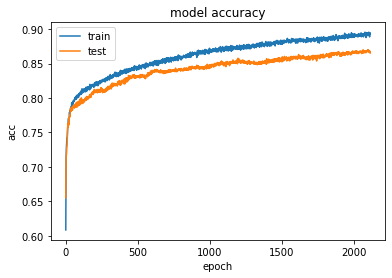

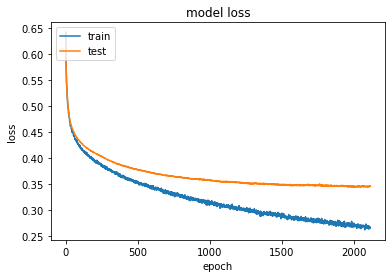

In [32]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [33]:
score = model.evaluate(x=X_test, y=y_test, verbose=1)

print("Test Score:", score[0])
print("Test ACC:", score[1])

1640/1640 [==============================] - 0s 14us/sample - loss: 0.3246 - acc: 0.8732
Test Score: 0.32459155982587395
Test ACC: 0.87317073


# feature extraction + machinelearning

In [34]:
df2

,VAR002,VAR003,VAR004,VAR005,VAR006,VAR007,VAR008,VAR009,VAR010,VAR011,...,VAR214,VAR217,VAR220,VAR221,VAR223,VAR224,VAR225,VAR226,VAR227,MRC_ID_DI
13746,-0.06089,0.3584,-0.14236,0.08314,-0.00841,0,0.2965,-0.18202,0.9334,-0.05455,...,-0.20634,0.04837,0.13177,0.08977,0.27230,-0.04413,0.02582,0.17679,-0.24452,1
1193,-0.03367,0.8111,0.33054,-0.18907,0.50606,0,0.4886,0.31240,0.1540,0.55700,...,0.22173,0.19258,-0.16388,-0.16951,-0.18113,-0.10811,-0.10341,-0.36850,0.29112,0
451,-0.03627,0.8279,0.13692,0.00587,0.47595,0,0.9115,0.17639,0.8451,0.69387,...,-0.02776,0.08458,-0.11550,-0.00113,-0.10418,-0.04688,-0.09820,-0.00405,0.42762,0
12658,0.12792,0.1166,-0.09195,0.07691,0.02707,0,0.1782,-0.15978,0.4563,0.18952,...,-0.09354,-0.09128,0.01816,0.06437,0.02745,0.31398,0.00316,0.15535,0.15747,1
2863,-0.03910,0.3933,0.08382,-0.04888,0.20399,0,0.2904,0.06168,0.8853,0.54524,...,-0.20188,0.05998,-0.10335,-0.04549,-0.08759,-0.07035,-0.04952,0.13356,0.26567,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6067,-0.05588,0.5902,-0.01794,0.02727,0.30702,0,0.4811,-0.07124,0.7522,0.49023,...,-0.00627,-0.02105,0.01838,0.04953,0.00744,-0.05669,0.00900,-0.07454,0.43960,0
303,0.00779,0.8573,0.09643,-0.17238,0.57101,0,0.5401,0.27440,0.3652,0.54342,...,0.30241,0.22383,-0.08010,-0.14624,-0.05792,-0.06233,-0.11014,-0.38185,0.27649,0
4734,0.01185,0.7955,0.19087,-0.11105,0.15742,0,0.2971,0.17121,0.7251,0.45311,...,0.22073,-0.22339,-0.11848,-0.09278,-0.07028,-0.03942,-0.14239,-0.30948,0.23604,0
8005,0.24850,0.9405,-0.01819,-0.09128,0.36717,1,0.3084,0.10080,0.0370,0.52156,...,0.21994,-0.08585,-0.02396,-0.08080,-0.05183,0.05814,0.54887,-0.19343,0.55406,0


In [35]:
X=df2.loc[:,'VAR002':'VAR227']
y=df2.loc[:,'MRC_ID_DI']
print(X.shape, y.shape)

(16400, 188) (16400,)


In [36]:
from sklearn.model_selection import train_test_split

# 데이터 나누기 - 6:2:2 비율
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=1)

print(x_train.shape, x_val.shape, x_test.shape)

(9840, 188) (3280, 188) (3280, 188)


## SVM

In [39]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [49]:
# 여러 가지 kernel을 사용해 SVM 학습하고 accuracy 계산하기
kernels = ['poly','rbf','sigmoid']

for kernel in kernels:
    print("==========================================") 
    model = SVC(kernel = kernel)
    model.fit(x_train, y_train)
    pred_val = model.predict(x_val)
    print(f"accuracy of {kernel}: {accuracy_score(y_val, pred_val)}")


accuracy of poly: 0.8371951219512195
accuracy of rbf: 0.8289634146341464
accuracy of sigmoid: 0.6597560975609756


In [66]:
# 여러 가지 kernel을 사용해 SVM 학습하고 accuracy 계산하기
model = SVC(kernel = 'poly', C=10000, gamma=0.01) # 파라이터값 그리드서치한 결과임 
model.fit(x_train, y_train)
new_pred_test = model.predict(x_test)
print(f'accuracy: {accuracy_score(y_test, new_pred_test)}')

accuracy: 0.9240853658536585


In [67]:
# kfold 반복자 StratifiedKFold(동일한 분포아닌경우)
from sklearn.model_selection import StratifiedKFold
skf=StratifiedKFold(n_splits=10,shuffle =True,random_state=0)


scores = cross_val_score(model,x_train,y_train,cv=skf)
print('cross validation scores :{}'.format(scores))
print('cross validation mean scores :{:.2f}'.format(scores.mean()))

cross validation scores :[0.92378049 0.91463415 0.94359756 0.93216463 0.94054878 0.91615854
 0.91692073 0.92378049 0.9214939  0.92378049]
cross validation mean scores :0.93


In [68]:
#kfold 반복자 kfold(동일한 분포 가진경우 )
from sklearn.model_selection import KFold
k=KFold(n_splits=10,shuffle =True,random_state=0)
scores = cross_val_score(model,x_train,y_train,cv=k)
print('cross validation scores :{}'.format(scores))
print('cross validation mean scores :{:.2f}'.format(scores.mean()))

cross validation scores :[0.9222561  0.91920732 0.91539634 0.92378049 0.92987805 0.9222561
 0.91844512 0.92301829 0.92835366 0.93597561]
cross validation mean scores :0.92


## Emsemble

In [52]:
# RandomForestClassifier를 사용해 분류기 학습 및 정확도 계산하기
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=300, random_state=1)
rf_clf.fit(x_train, y_train)
pred_test_rf = rf_clf.predict(x_test)
print(f'accuracy: {accuracy_score(y_test, pred_test_rf)}')

accuracy: 0.9411585365853659


In [60]:
#kfold 반복자 kfold(동일한 분포 가진경우 )
from sklearn.model_selection import KFold
k=KFold(n_splits=10,shuffle =True,random_state=0)
scores = cross_val_score(rf_clf,x_train,y_train,cv=k) # train이 맞을까 ? 
print('cross validation scores :{}'.format(scores))
print('cross validation mean scores :{:.2f}'.format(scores.mean()))

cross validation scores :[0.93445122 0.93521341 0.93140244 0.94054878 0.93445122 0.93597561
 0.93902439 0.9382622  0.94512195 0.93597561]
cross validation mean scores :0.94


In [70]:
from sklearn.model_selection import GridSearchCV

In [71]:
# GridSearchCV를 이용해 최적의 조합을 찾고 그 때의 정확도 계산하기
n_estimators = [100, 200, 300]
max_featrues = ['auto', 0.2, 0.5]
min_samples_leaf = [1, 5]
max_depth = [None, 10]
max_samples = [1000]

param_grid = {'n_estimators' : n_estimators, 'max_features': max_featrues, 
              'min_samples_leaf': min_samples_leaf, 'max_depth': max_depth, 
              'max_samples': max_samples}

rf_grid = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv=4, scoring='accuracy')

rf_grid.fit(x_train, y_train)

GridSearchCV(cv=4, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10],
                         'max_features': ['auto', 0.2, 0.5],
                         'max_samples': [1000], 'min_samples_leaf': [1, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [72]:
print(rf_grid.best_params_)
pred_test_rf_grid = rf_grid.predict(x_test)
print(f'accuracy: {accuracy_score(y_test, pred_test_rf_grid)}')

{'max_depth': None, 'max_features': 0.5, 'max_samples': 1000, 'min_samples_leaf': 1, 'n_estimators': 300}
accuracy: 0.8210365853658537


In [74]:
#kfold 반복자 kfold(동일한 분포 가진경우 )
from sklearn.model_selection import KFold
k=KFold(n_splits=10,shuffle =True,random_state=0)
scores = cross_val_score(rf_grid,x_train,y_train,cv=k)
print('cross validation scores :{}'.format(scores))
print('cross validation mean scores :{:.2f}'.format(scores.mean()))

KeyboardInterrupt: 